In [1]:
import pickle 
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt 
from cycler import cycler
import numpy as np

plt.rcParams["mathtext.fontset"] = "cm" 
plt.rcParams["font.family"] = "serif"

In [2]:
NRCB_RC = Path.home() / "extinction/assets/" 

NRCB1_f = "NRCB1_red_clump_stars.pickle" 
NRCB2_f = "NRCB2_red_clump_stars.pickle"  
NRCB3_f = "NRCB3_red_clump_stars.pickle"  
NRCB4_f = "NRCB4_red_clump_stars.pickle" 

In [3]:
with open (NRCB_RC / NRCB1_f, "rb") as f: 
    NRCB1 = pickle.load(f)
with open (NRCB_RC / NRCB2_f, "rb") as f: 
    NRCB2 = pickle.load(f) 
with open (NRCB_RC / NRCB3_f, "rb") as f: 
    NRCB3 = pickle.load(f) 
with open (NRCB_RC / NRCB4_f, "rb") as f: 
    NRCB4 = pickle.load(f) 

combined = pd.concat([NRCB1, NRCB2, NRCB3, NRCB4], ignore_index=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


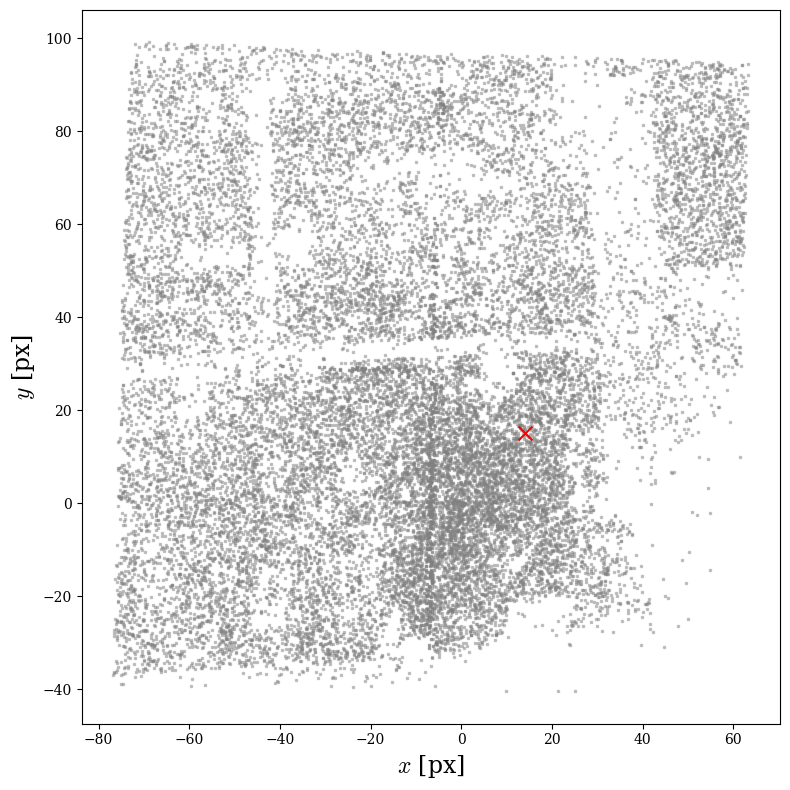

In [45]:
SAG_A_REFERENCE = (14, 15)

x, y = combined["x"], combined["y"]

fig, axis = plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(x, y, color='grey', marker=',', s=1, alpha=0.4)
plt.scatter(*SAG_A_REFERENCE, color='red', marker='x', s=100)

leg = plt.legend(
    frameon=True,          
    facecolor="white",     
    edgecolor="none",    
    fontsize=15,
)
leg.get_frame().set_boxstyle("square")

plt.xlabel(r"$x$ [px]", fontsize=17)
plt.ylabel(r"$y$ [px]", fontsize=17)

plt.tight_layout()
plt.show()

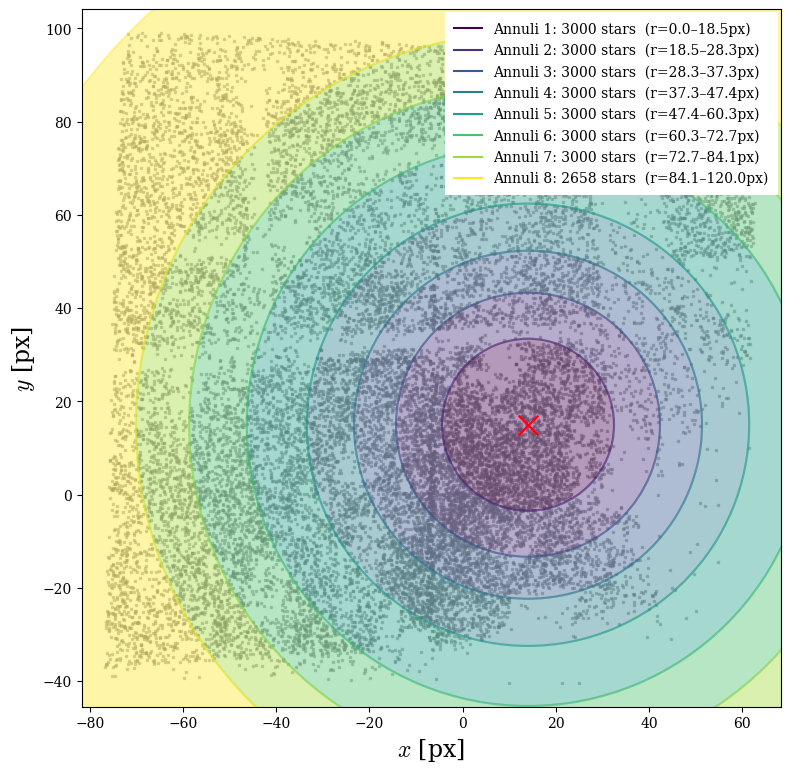

In [74]:
from matplotlib.patches import Circle
from matplotlib.lines import Line2D
from matplotlib.patches import Wedge

min_stars = 3000

x0, y0 = SAG_A_REFERENCE
r = np.hypot(x - x0, y - y0)
r_sorted = np.sort(r)

edges = [0.0]
counts = []
i = 0
n = len(r_sorted)

while i < n:
  j = min(i + min_stars, n)
  r_outer = r_sorted[j - 1]
  while j < n and r_sorted[j] == r_outer:
      j += 1
  edges.append(r_sorted[j - 1])
  counts.append(j - i)
  i = j


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(x, y, color="grey", marker=",", s=1, alpha=0.4, zorder=1)
ax.scatter(x0, y0, color="red", marker="x", s=200, zorder=3, label=r"Sgr $A^*$")

# annulus boundaries
colors = plt.cm.viridis(np.linspace(0, 1, len(edges[1:])))
for idx, r_out in enumerate(edges[1:]):
  r_in = edges[idx]
  ax.add_patch(Wedge(
      (x0, y0), r_out, 0, 360, width=(r_out - r_in),
      facecolor=colors[idx], edgecolor=colors[idx],
      alpha=0.4, lw=1.5, zorder=2
  ))

handles = []
labels = []
for i in range(len(counts)):
  r_in = edges[i]
  r_out = edges[i + 1]
  handles.append(Line2D([0], [0], color=colors[i], lw=1.5))
  labels.append(rf"Annuli {i+1}: {counts[i]} stars  (r={r_in:.1f}–{r_out:.1f}px)")

leg = ax.legend(handles, labels, frameon=True, facecolor="white",
              edgecolor="none", fontsize=10, loc="upper right", framealpha=1.0)
leg.get_frame().set_boxstyle("square")

pad = 5
ax.set_xlim(x.min() - pad, x.max() + pad)
ax.set_ylim(y.min() - pad, y.max() + pad)

ax.set_xlabel(r"$x$ [px]", fontsize=17)
ax.set_ylabel(r"$y$ [px]", fontsize=17)
ax.set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.savefig("/Users/vinland/moving_universe/output/analysis/annuli.png", dpi=300)
plt.show()